<a href="https://colab.research.google.com/github/KasinaSatwik/NLP_Project/blob/main/Train_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd gdrive/My Drive/NLP_Project

[Errno 2] No such file or directory: 'gdrive/My Drive/NLP_Project'
/content/gdrive/My Drive/NLP_Project


In [ ]:
data = pd.read_csv('final.csv', usecols=['text','compound'])

In [ ]:
data

,text,compound
0,elonmusk interest,0.4588
1,jhous elonmusk thank later httpstcollwlzoyxa,0.3612
2,elonmusk im keen smilingfacewithsmilingey,0.3612
3,elonmusk crypto pump,0.0000
4,hcyc elonmusk thank later httpstcollwlzoyxa,0.3612
...,...,...
20183,elonmusk shıba hakkkında birşeyl söyle artık y...,0.0000
20184,jaw thusoafrica elonmusk thin atmospher dead p...,-0.6486
20185,mervaio elonmusk elon,0.0000
20186,starshiptoken elonmusk hold x gem star rocket ...,0.0000


In [ ]:
data['compound'].values[data['compound'].values >= 0] = 1
data['compound'].values[data['compound'].values < 0] = 0


In [ ]:
data

,text,compound
0,elonmusk interest,1.0
1,jhous elonmusk thank later httpstcollwlzoyxa,1.0
2,elonmusk im keen smilingfacewithsmilingey,1.0
3,elonmusk crypto pump,1.0
4,hcyc elonmusk thank later httpstcollwlzoyxa,1.0
...,...,...
20183,elonmusk shıba hakkkında birşeyl söyle artık y...,1.0
20184,jaw thusoafrica elonmusk thin atmospher dead p...,0.0
20185,mervaio elonmusk elon,1.0
20186,starshiptoken elonmusk hold x gem star rocket ...,1.0


In [ ]:
X=data.text
y=data.compound

In [ ]:
#data_neg = data['text'][:800000]
#plt.figure(figsize = (20,20))
#wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               #collocations=False).generate(" ".join(data_neg))
#plt.imshow(wc)


In [ ]:
#data_pos = data['text'][800000:]
#wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              #collocations=False).generate(" ".join(data_neg))
#plt.figure(figsize = (20,20))
#plt.imshow(wc)

In [ ]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [ ]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [ ]:
print(y_test)

5712     1.0
19862    1.0
17022    1.0
14925    1.0
103      1.0
        ... 
13302    1.0
9055     1.0
4278     1.0
19948    1.0
17334    1.0
Name: compound, Length: 1010, dtype: float64


In [ ]:
print(X_test)

  (0, 67866)	0.15246053498326834
  (0, 67863)	0.15223187966637938
  (0, 66577)	0.1591112871453836
  (0, 66573)	0.12880271192534362
  (0, 66555)	0.15263282872854955
  (0, 66554)	0.11803048945126103
  (0, 66548)	0.18734723856383687
  (0, 65642)	0.15240325695313126
  (0, 65613)	0.150774569119285
  (0, 52690)	0.15246053498326834
  (0, 52655)	0.15243188642186073
  (0, 52638)	0.29809255009564467
  (0, 45610)	0.15217490549856044
  (0, 45607)	0.10233061743006733
  (0, 29533)	0.10788505363724979
  (0, 24610)	0.15246053498326834
  (0, 24609)	0.15217490549856044
  (0, 24595)	0.09368091336738271
  (0, 24593)	0.15217490549856044
  (0, 24591)	0.18692525550844455
  (0, 24578)	0.15286363393782654
  (0, 24574)	0.10596885068072108
  (0, 24564)	0.1525178894860985
  (0, 24561)	0.09376123015437582
  (0, 24555)	0.11804334935743059
  :	:
  (1007, 23694)	0.15576899627226437
  (1007, 23679)	0.15397847639716336
  (1007, 22017)	0.15532904286102733
  (1007, 21981)	0.1541770027961402
  (1007, 20904)	0.156183647507

In [ ]:
def model_Evaluate(model):
 y_test_arg=(y_test.astype(int))
 y_pred = model.predict(X_test)
 print(classification_report(y_test_arg, y_pred))
 cf_matrix = confusion_matrix(y_test_arg, y_pred)
 categories = ['Negative','Positive']
 group_names = ['True Neg', 'False Pos', 'False Neg','True Pos']
 group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
 labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_percentages)]
 labels = np.asarray(labels).reshape(2,2)
 sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
 xticklabels = categories, yticklabels = categories)
 plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
 plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
 plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [ ]:
print(y_test.astype(int))

5712     1
19862    1
17022    1
14925    1
103      1
        ..
13302    1
9055     1
4278     1
19948    1
17334    1
Name: compound, Length: 1010, dtype: int64


Model-1   Bernoulli Naive Bayes

              precision    recall  f1-score   support

           0       0.81      0.56      0.67       117
           1       0.95      0.98      0.96       893

    accuracy                           0.93      1010
   macro avg       0.88      0.77      0.82      1010
weighted avg       0.93      0.93      0.93      1010



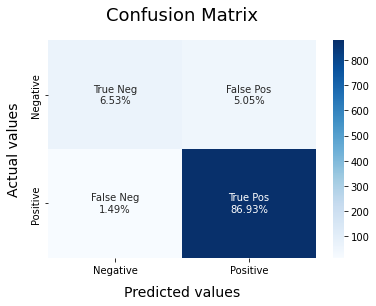

In [ ]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train.astype(int))
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

Model-2     SVM (Support Vector Machine)

              precision    recall  f1-score   support

           0       0.95      0.75      0.84       117
           1       0.97      0.99      0.98       893

    accuracy                           0.97      1010
   macro avg       0.96      0.87      0.91      1010
weighted avg       0.97      0.97      0.96      1010



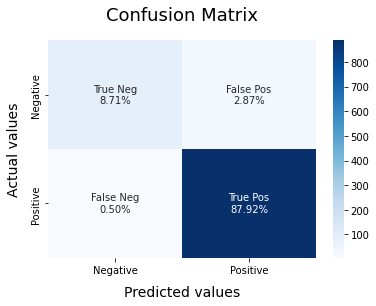

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

Model-3   Logistic Regression

              precision    recall  f1-score   support

           0       0.96      0.65      0.78       117
           1       0.96      1.00      0.98       893

    accuracy                           0.96      1010
   macro avg       0.96      0.82      0.88      1010
weighted avg       0.96      0.96      0.95      1010



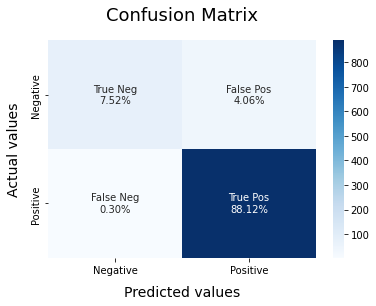

In [ ]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)